# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime, timezone

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Resources/weatherData.csv'"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

temp=[]
cityList=[]
country=[]
lat=[]
lon=[]
cloudiness=[]
humidity=[]
date=[]
maxTemp=[]
wind=[]
timezone=[]
localTimestamp=[]

row_count = 0
set_count=1

#Retrieving current datafrom wethermap api
print("Beginning Data Retrieval")
print("---------------------------")
for city in cities:
    # Build query URL and request your results
    try:
        row_count+=1
        query_url = f"{url}appid={api_key}&q={city}&units={units}"
        print(f"Processing records {row_count} of set {set_count}| {city}")
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        # Extracting values for plotting
        if weather_json["cod"] != "404":
            cityList.append(city)
            temp.append(weather_json['main']['temp'])
            country.append(weather_json['sys']['country'])
            lat.append(weather_json['coord']['lat'])
            lon.append(weather_json['coord']['lon'])
            cloudiness.append(weather_json['clouds']['all'])
            wind.append(weather_json['wind']['speed'])
            date.append(weather_json['dt'])
            humidity.append(weather_json['main']['humidity'])
            maxTemp.append(weather_json['main']['temp_max'])
            timezone.append(weather_json['timezone'])
            localDate = int(weather_json['dt']) + int(weather_json['timezone'])
            ts=datetime.fromtimestamp(localDate).strftime('%m-%d-%y')
            localTimestamp.append(ts)
            
    except  Exception as e:
        print(f"city({city}) not found!! skipping")
        print(e)
        pass
    if row_count % 50 == 0:
       set_count+=1
       row_count=0
print("--------------------------------")
print("Data Retrieval Complete ")
print("--------------------------------")

Beginning Data Retrieval
---------------------------
Processing records 1 of set 1| olafsvik
Processing records 2 of set 1| jamestown
Processing records 3 of set 1| atuona
Processing records 4 of set 1| saint george
Processing records 5 of set 1| rikitea
Processing records 6 of set 1| nikolskoye
Processing records 7 of set 1| olinda
Processing records 8 of set 1| saskylakh
Processing records 9 of set 1| ribeira grande
Processing records 10 of set 1| albany
Processing records 11 of set 1| mataura
Processing records 12 of set 1| stokmarknes
Processing records 13 of set 1| port alfred
Processing records 14 of set 1| east london
Processing records 15 of set 1| santa ana
Processing records 16 of set 1| yulara
Processing records 17 of set 1| longyearbyen
Processing records 18 of set 1| gamba
Processing records 19 of set 1| kavaratti
Processing records 20 of set 1| cabo san lucas
Processing records 21 of set 1| cherskiy
Processing records 22 of set 1| barentsburg
Processing records 23 of set 

Processing records 49 of set 4| zelenogorskiy
Processing records 50 of set 4| tombouctou
Processing records 1 of set 5| pacific grove
Processing records 2 of set 5| abu samrah
Processing records 3 of set 5| rawson
Processing records 4 of set 5| hambantota
Processing records 5 of set 5| darhan
Processing records 6 of set 5| nanning
Processing records 7 of set 5| iqaluit
Processing records 8 of set 5| chuy
Processing records 9 of set 5| tifton
Processing records 10 of set 5| te anau
Processing records 11 of set 5| hovd
Processing records 12 of set 5| hihifo
Processing records 13 of set 5| chokurdakh
Processing records 14 of set 5| terra nova
Processing records 15 of set 5| deputatskiy
Processing records 16 of set 5| sentyabrskiy
Processing records 17 of set 5| margate
Processing records 18 of set 5| narsaq
Processing records 19 of set 5| evensk
Processing records 20 of set 5| mahaicony
Processing records 21 of set 5| nome
Processing records 22 of set 5| north bend
Processing records 23 o

Processing records 48 of set 8| chardara
Processing records 49 of set 8| vestmanna
Processing records 50 of set 8| bosaso
Processing records 1 of set 9| sri aman
Processing records 2 of set 9| aksu
Processing records 3 of set 9| divnomorskoye
Processing records 4 of set 9| aripuana
Processing records 5 of set 9| lolua
Processing records 6 of set 9| ulaangom
Processing records 7 of set 9| mogadishu
Processing records 8 of set 9| kazalinsk
Processing records 9 of set 9| amderma
Processing records 10 of set 9| si sa ket
Processing records 11 of set 9| verkhnya syrovatka
Processing records 12 of set 9| tarakan
Processing records 13 of set 9| port hardy
Processing records 14 of set 9| mayumba
Processing records 15 of set 9| ovalle
Processing records 16 of set 9| atar
Processing records 17 of set 9| hurghada
Processing records 18 of set 9| kuminskiy
Processing records 19 of set 9| tateyama
Processing records 20 of set 9| kaeo
Processing records 21 of set 9| lokosovo
Processing records 22 of 

Processing records 44 of set 12| portland
Processing records 45 of set 12| capreol
Processing records 46 of set 12| mezen
Processing records 47 of set 12| wronki
Processing records 48 of set 12| marrakesh
Processing records 49 of set 12| haines junction
Processing records 50 of set 12| bumba
Processing records 1 of set 13| krasnovka
Processing records 2 of set 13| korla
--------------------------------
Data Retrieval Complete 
--------------------------------


### Create Dictionary For All The Required Data
* Assign all list values 


In [6]:
# create a data frame for city weather data
weather_dict = {
    "City": cityList,
    "Cloudiness":cloudiness,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Temp": temp,
    "Lat":lat,
    "Lon":lon,
    "Max Temp":maxTemp,
    "Wind Speed":wind,
    "Date-Local": localTimestamp
}
weather_data = pd.DataFrame(weather_dict)



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
WeatherDataCSV=weather_data.to_csv(output_data_file,index=False,header=True)

#Displaying data 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lon,Max Temp,Wind Speed,Date-Local
0,jamestown,0,AU,1562104951,91,46.34,-33.21,138.60,46.34,6.60,07-03-19
1,atuona,7,PF,1562104701,76,80.72,-9.80,-139.03,80.72,13.60,07-02-19
2,saint george,0,GR,1562104801,68,72.28,39.45,22.34,75.20,2.71,07-02-19
3,rikitea,100,PF,1562104952,85,66.50,-23.12,-134.97,66.50,19.95,07-02-19
4,nikolskoye,75,RU,1562104988,77,57.72,59.70,30.79,60.80,4.47,07-02-19


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

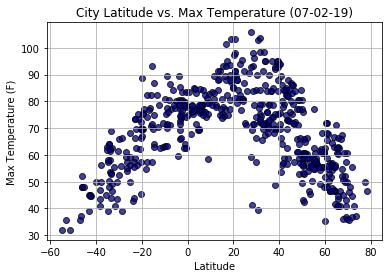

In [8]:
#Defining the max and min values for axises
xMax=weather_data['Lat'].max()
xMin=weather_data['Lat'].min()
yMax=weather_data['Max Temp'].max()
yMin=weather_data['Max Temp'].min()

#Assigning x and y axis data for plotting
x=weather_data['Lat']
y=weather_data['Max Temp']

fig, bubblePlot = plt.subplots()
plt.grid(True)
bubblePlot.scatter(x, y, c='darkblue', marker="o",label=None, edgecolors="black", alpha=0.75)

#Display Title, x and y axiis label
plt.title(f"City Latitude vs. Max Temperature ({ts})")
plt.xlabel("Latitude") 
plt.ylabel("Max Temperature (F)")

#saving plot image to Image folder
fig.savefig('Images/LatvsMaxTemp.png')

#### Latitude vs. Humidity Plot

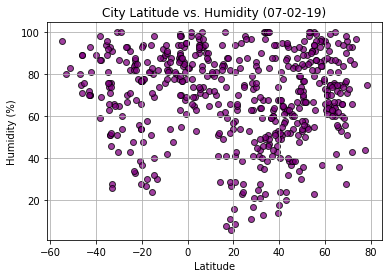

In [9]:
#Defining the max and min values for axises
xMax=weather_data['Lat'].max()
xMin=weather_data['Lat'].min()
yMax=weather_data['Humidity'].max()
yMin=weather_data['Humidity'].min()

#Assigning x and y axis data for plotting
x=weather_data['Lat']
y=weather_data['Humidity']

fig, bubblePlot = plt.subplots()
plt.grid(True)
bubblePlot.scatter(x, y, c='purple', marker="o",label=None, edgecolors="black", alpha=0.75)

#Display Title, x and y axiis label
plt.title(f"City Latitude vs. Humidity ({ts})")
plt.xlabel("Latitude") 
plt.ylabel("Humidity (%)")

#Saving plot image to Image folder
fig.savefig('Images/LatvsHumidity.png')

#### Latitude vs. Cloudiness Plot

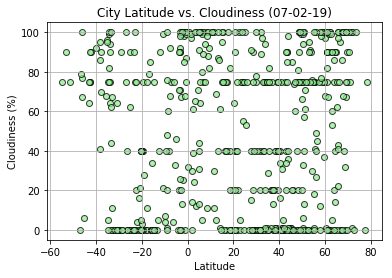

In [10]:
#Defining the max and min values for axises
xMax=weather_data['Lat'].max()
xMin=weather_data['Lat'].min()
yMax=weather_data['Cloudiness'].max()
yMin=weather_data['Cloudiness'].min()

#Assigning x and y axis data for plotting
x=weather_data['Lat']
y=weather_data['Cloudiness']
fig, bubblePlot = plt.subplots()
plt.grid(True)
bubblePlot.scatter(x, y, c='lightgreen', marker="o",label=None, edgecolors="black", alpha=0.75)

#Display Title, x and y axiis label
plt.title(f"City Latitude vs. Cloudiness ({ts})")
plt.xlabel("Latitude") 
plt.ylabel("Cloudiness (%)")

#Saving plot image to Image folder
fig.savefig('Images/LatvsCloudiness.png')

#### Latitude vs. Wind Speed Plot

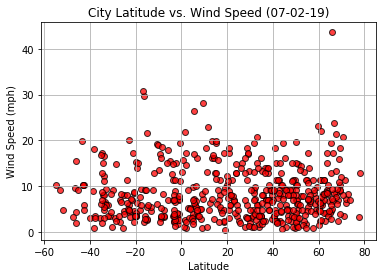

In [11]:
#Defining the max and min values for axises
xMax=weather_data['Lat'].max()
xMin=weather_data['Lat'].min()
yMax=weather_data['Wind Speed'].max()
yMin=weather_data['Wind Speed'].min()

#Assigning x and y axis data for plotting
x=weather_data['Lat']
y=weather_data['Wind Speed']

fig, bubblePlot = plt.subplots()
plt.grid(True)
bubblePlot.scatter(x, y, c='red', marker="o",label=None, edgecolors="black", alpha=0.75)

#Display Title, x and y axiis label
plt.title(f"City Latitude vs. Wind Speed ({ts})")
plt.xlabel("Latitude") 
plt.ylabel("Wind Speed (mph)")

#Saving plot image to Image folder
fig.savefig('Images/LatvsWindSpeed.png')
